In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [17]:
np.random.seed(42)

# Gerando dados aleatórios
x1 = np.random.normal(25, 5, 1000)
y1 = np.random.normal(25, 5, 1000)
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)
x3 = np.random.normal(45, 5, 1000)
y3 = np.random.normal(15, 5, 1000)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))
data = np.column_stack((x, y))

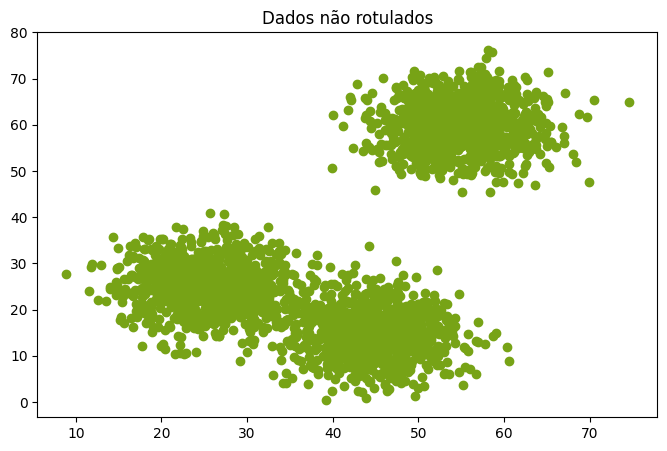

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(x,y,c='#77A316')
plt.title('Dados não rotulados')
plt.show()

In [19]:
class kmeans:
    def __init__(self, K, data):
        self.K = K
        self.data = data
        indices = np.random.choice(self.data.shape[0], K, replace=False)
        self.centroids = data[indices]
        self.labels = np.zeros(self.data.shape[0])

    def update_centroids(self):
        for i in range(self.K):
            points = self.data[self.labels == i]
            if points.size:
                self.centroids[i] = points.mean(axis=0)

    def assign_clusters(self):
        for i in range(self.data.shape[0]):
            distances = np.linalg.norm(self.data[i] - self.centroids, axis=1)
            self.labels[i] = np.argmin(distances)

    def fit(self):
        self.assign_clusters()
        self.update_centroids()

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado

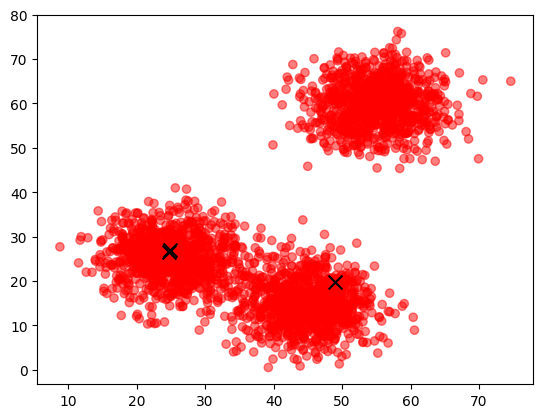

In [20]:
# Configuração inicial para a animação
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']

def animate(frame):
    ax.clear()
    ax.scatter(x, y, c=[colors[int(label)] for label in model.labels], alpha=0.5)
    ax.scatter(model.centroids[:, 0], model.centroids[:, 1], c='black', marker='x', s=100)
    model.fit()

model = kmeans(3, data)
ani = FuncAnimation(fig, animate, frames=10, interval=1000, repeat=False)

# Salvar a animação
FFwriter = animation.FFMpegWriter(fps=1)
ani.save('kmeans_animation.mp4', writer=FFwriter)

plt.show()